### Reading a sensor and turning a light on and off

### Robert's code to define a light that can be turned on (True) or off (False).

Create a light with

```
aLight = iotLight()
```
    
Set the light on or off (True or False) at a timestep

    timestep = 10
    aLight.setLight(timestep, True)

Check if the light is on

    myLightIsOn = aLight.lightIsOn()


In [1]:
class iotLight():
    def __init__(self):
        self._lightIsOn = False

        self.lightOnTime = []
        self.lightOffTime = []
    
    def setLight(self, timeStep : int, value : bool):
        """Set light on/off at a timestep.
        """
        self._lightIsOn = value

        if value:
            self.lightOnTime.append(timeStep)
        else:
            self.lightOffTime.append(timeStep)

    def lightIsOn(self):
        """True if light is on, Flase if it is off.
        """
        return self._lightIsOn


### Robert's code to simulate a light intensity sensor

Create a light sensor

    aLightSensor = lightSensor()

We can get a sensor value like this:

    timeStep = 10  # for example
    newValue = aLightSensor.getSensorValue(timeStep)



In [10]:
import math
from matplotlib import pyplot as plt

class lightSensor():
    def __init__(self):
        self.values = []
    
    def getSensorValue(self, timeStep):
        """Get the value of the sensor at a given timestep.
        """
        timeStep += 100
        theValue = math.sin(math.radians(timeStep))
        theValue = theValue * 10
        theValue = theValue + 10

        self.values.append(theValue)

        return theValue
        
# utility function to plot results at end
def plotResults(light, lightSensor, thresholdValue):
    lightOnTime = light.lightOnTime
    lightOffTime = light.lightOffTime

    plt.plot(lightSensor.values)
    plt.plot(lightOnTime, [thresholdValue]*len(lightOnTime), 'og')
    plt.plot(lightOffTime, [thresholdValue]*len(lightOffTime), 'or');

### Test the light sensor

Our light sensor will basically track daylight from dark to light and back to dark.

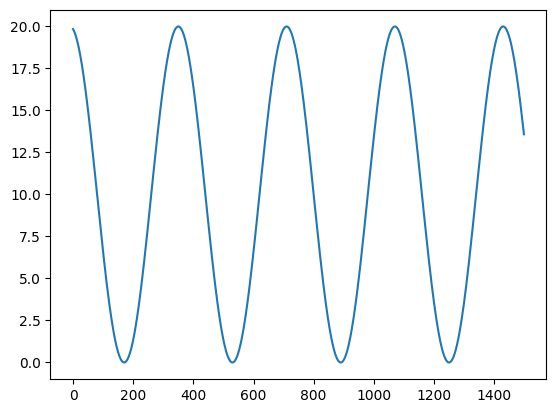

In [11]:
# we will be using this simulated sensort data
aLightSensor = lightSensor()

for timeStep in range(1500):
    currentValue = aLightSensor.getSensorValue(timeStep)

plt.plot(aLightSensor.values);


### Write Arduino code to turn the light on and off

What is wrong with this code and how could it be improved?

If this is our smart home, how often to we have to tell Alexa to turn the light on/off?

Try and fix this code to only turn on the light if it is off, likewise only turn off the light when it is on.

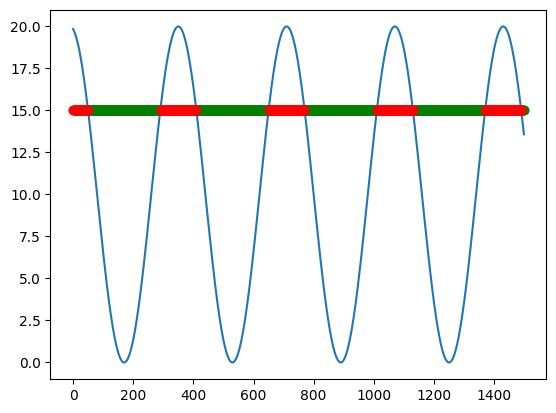

In [12]:
# create a light snesor
aLightSensor = lightSensor()

# create an iot light
myLight = iotLight()

# define a threshold
# above this value will turn the light on
# below this value the light is off
thresholdValue = 15

# loop
for timeStep in range(1500):
    
    # get the current sensor value
    currentValue = aLightSensor.getSensorValue(timeStep)

    if currentValue > thresholdValue:
        myLight.setLight(timeStep, False)
    else:
        myLight.setLight(timeStep, True)

    # write an if statement that says:
    # if the current value is greater than our threshold and light is on
    # then
    #   turn the light off
    #   myLight.setLight(timeStep, False)

    # write another if statement that says:
    # if the current value is less than our threshold and light is not on
    # then
    #   turn the light on
    #   myLight.setLight(timeStep, True)

# plot the results (do not edit this!!!!)
plotResults(myLight, aLightSensor, thresholdValue)


### Solution

Don't cheat, try and get this working above!!!

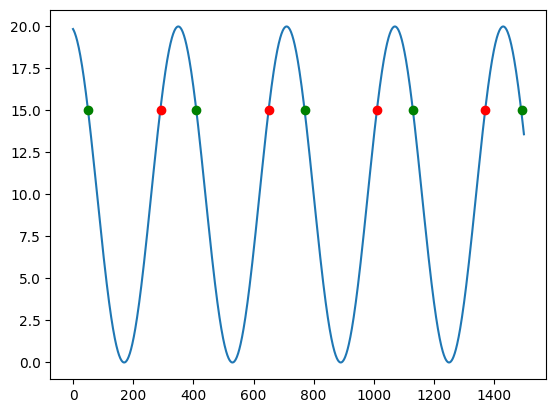

In [13]:
# solution

# create a light snesor
aLightSensor = lightSensor()

myLight = iotLight()

# define a threshold
# above this value will turn the light on
# below this value the light is off
thresholdValue = 15

#
# loop
#
for timeStep in range(1500):
    
    # get the current sensor value
    currentValue = aLightSensor.getSensorValue(timeStep)

    lightIsOn = myLight.lightIsOn()
    
    # write an if statement that says:
    # if the current value is greater than our threshold and light is not on
    # then
    #   turn the light on

    # write another if statement that says:
    # if the current value is less than our threshold and light is on
    # then
    #   turn the light off
    if (currentValue > thresholdValue) and lightIsOn:
        myLight.setLight(timeStep, False)

    elif (currentValue < thresholdValue) and not lightIsOn:
        myLight.setLight(timeStep, True)

plotResults(myLight, aLightSensor, thresholdValue)